# The Sparks Foundation Internship
## Task 2 - Data Science and Business Analytics
## Prediction Using Unsupervised ML
* Predict the optimum number of clusters and represent it visually.
* Data can be found at 'https://bit.ly/3kXTdox'.

# Name : Nawaz Siddiqui

### Importing required libraries

In [1]:
import numpy as np                                       # Required for mathematical operations
import pandas as pd                                      # Required for data manupilation and storage
import matplotlib.pyplot as plt                          # Required for plotting
import seaborn as sns                                    # Required for plotting
from sklearn.cluster import KMeans                       # Required for creating ML model
from sklearn.preprocessing import StandardScaler         # Required for scaling the data

### Reading the data

In [2]:
df = pd.read_csv('Iris.csv')      #Loading the data from the file Iris.csv
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking missing values

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Here we can see that there are no missing values

### Outlier Detection

<AxesSubplot:ylabel='PetalWidthCm'>

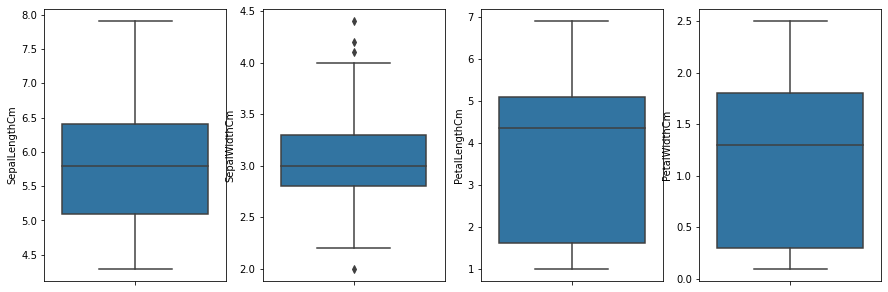

In [4]:
plt.rcParams["figure.figsize"] = (15,5)
f, axes = plt.subplots(1,4)
sns.boxplot(y = 'SepalLengthCm', data = df, ax = axes[0])
sns.boxplot(y = 'SepalWidthCm', data = df, ax = axes[1])
sns.boxplot(y = 'PetalLengthCm', data = df, ax = axes[2])
sns.boxplot(y = 'PetalWidthCm', data = df, ax = axes[3])

There are only 4 outliers, hence we can ignore it

### Scaling the data

To give equal importance to all features, we need to scale the features. For this we will be using scikit-learn’s StandardScaler.

In [5]:
df.drop(['Id','Species'],axis = 1,inplace = True)   #Since we don't need Id and Species data
ss = StandardScaler()
ss.fit(df)
data_transformed = ss.transform(df)

### Elbow Method (To predict the optimum number of clusters)

C:\Users\nawaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


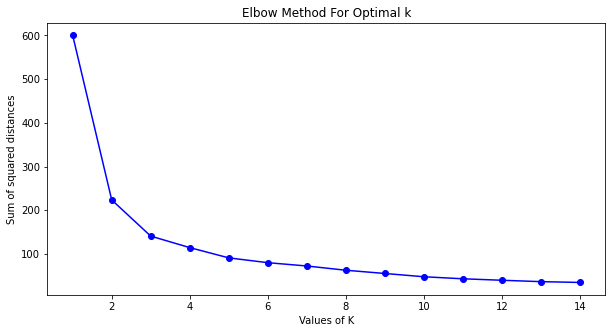

In [6]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(K, Sum_of_squared_distances,'bo-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method states that the optimal number of clusters is at the point where Sum_of_squared_distance doesn't change significantly with each iteration.

Here, we can see that the Sum_of_squared_distance doesn't change significantly when K = 3

Hence K = 3 is the optimal value.

### Visualizing the cluster

In [7]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
km = kmeans.fit_predict(data_transformed)

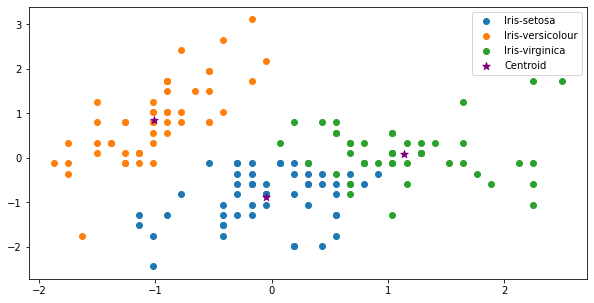

In [8]:
plt.rcParams["figure.figsize"] = (10,5)

plt.scatter(data_transformed[km == 0,0 ],data_transformed[km == 0,1 ], label='Iris-setosa')
plt.scatter(data_transformed[km == 1,0 ],data_transformed[km == 1,1 ], label='Iris-versicolour')
plt.scatter(data_transformed[km == 2,0 ],data_transformed[km == 2,1 ], label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,color='purple', marker='*', label="Centroid")
plt.legend()
plt.show()

### Conclusion : 
* The number of optimum clusters for the given Iris Dataset is 3